In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf

%matplotlib inline

# Question 1)
       Prepare a prediction model for profit of 50_startups data.
       Do transformations for getting better predictions of profit and
        make a table containing R^2 value for each prepared model.

In [2]:
#Read the data set
startup=pd.read_csv("50_Startups.csv")
startup

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [3]:
startup=startup.rename({'R&D Spend':'RD','Administration':'AD','Marketing Spend':'MS'},axis=1)

# EDA

In [4]:
startup.columns

Index(['RD', 'AD', 'MS', 'State', 'Profit'], dtype='object')

In [5]:
startup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RD      50 non-null     float64
 1   AD      50 non-null     float64
 2   MS      50 non-null     float64
 3   State   50 non-null     object 
 4   Profit  50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [6]:
startup.describe()

,RD,AD,MS,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [7]:
startup.head()

,RD,AD,MS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [8]:
startup.tail()

,RD,AD,MS,State,Profit
45,1000.23,124153.04,1903.93,New York,64926.08
46,1315.46,115816.21,297114.46,Florida,49490.75
47,0.00,135426.92,0.00,California,42559.73
48,542.05,51743.15,0.00,New York,35673.41
49,0.00,116983.80,45173.06,California,14681.40


In [9]:
startup.sample()

,RD,AD,MS,State,Profit
1,162597.7,151377.59,443898.53,California,191792.06


In [10]:
startup.isna().sum()

RD        0
AD        0
MS        0
State     0
Profit    0
dtype: int64

# Data Visualization

In [11]:
startup.corr()

,RD,AD,MS,Profit
RD,1.000000,0.241955,0.724248,0.972900
AD,0.241955,1.000000,-0.032154,0.200717
MS,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


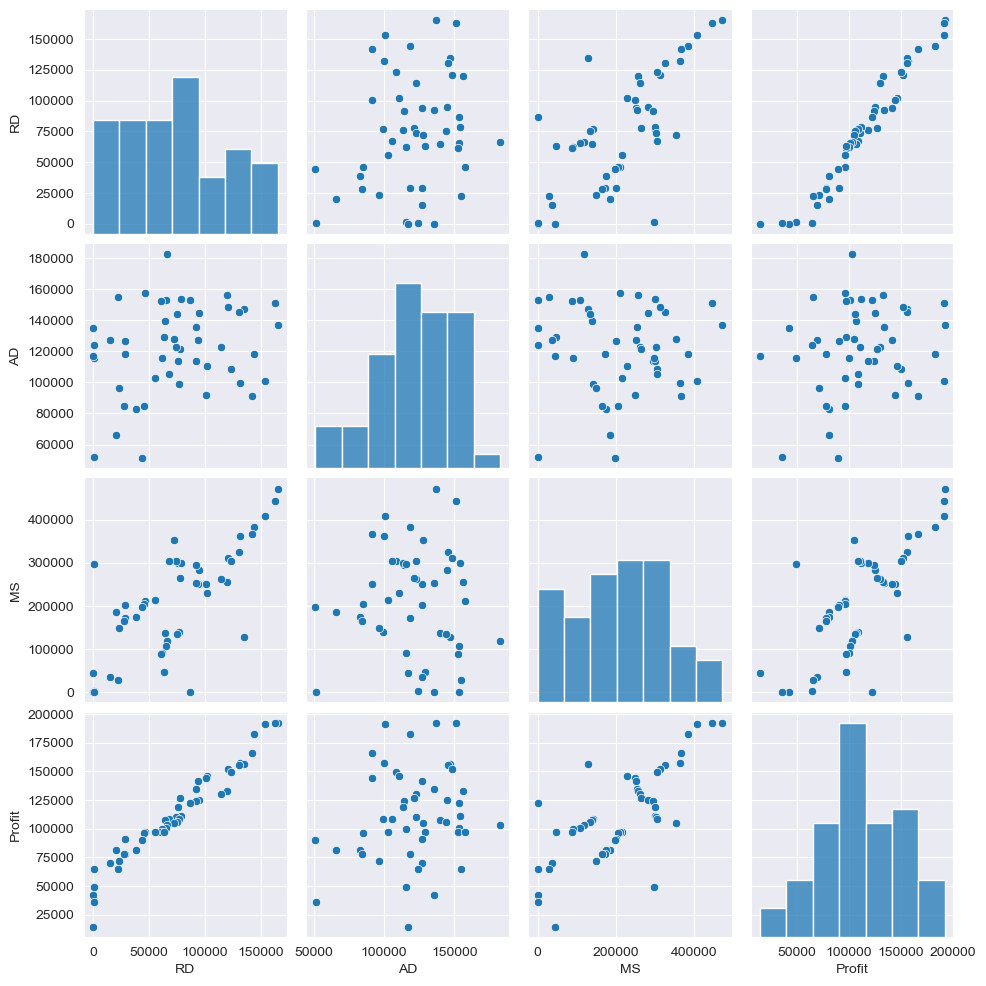

In [12]:
sns.set_style(style='darkgrid')
sns.pairplot(startup)

Text(0, 0.5, 'Profit')

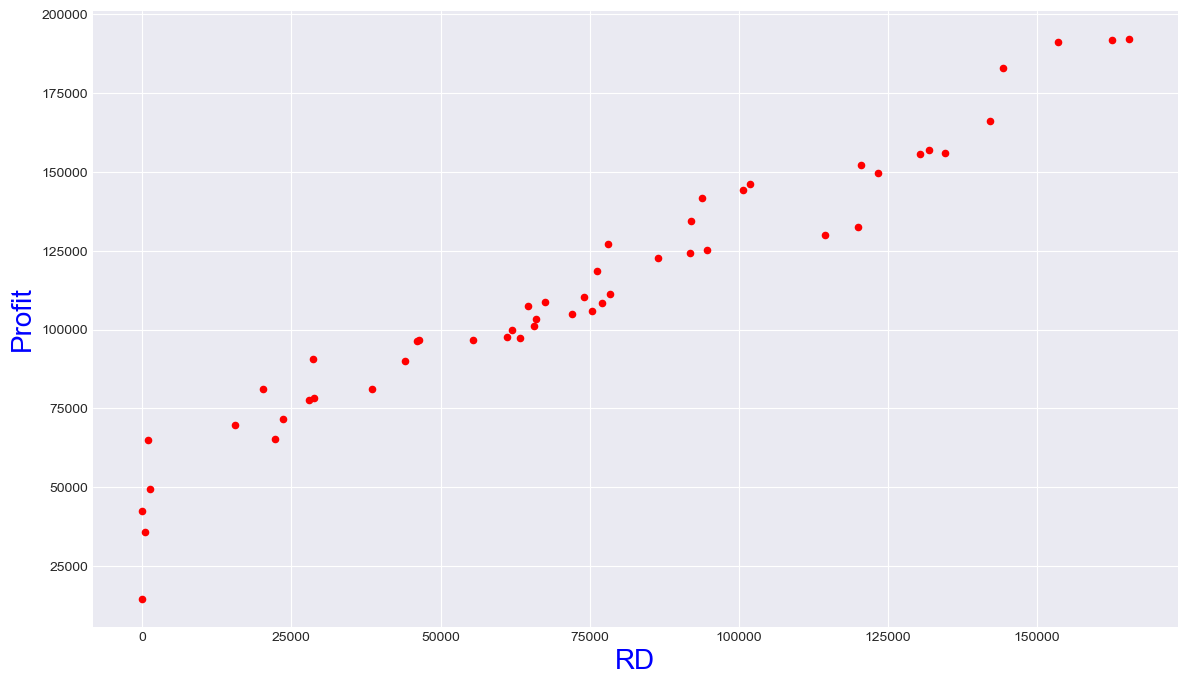

In [13]:
plt.figure(figsize=(14,8))
plt.style.use("seaborn-darkgrid")
plt.scatter(startup["RD"],startup["Profit"],s=20,color="red")
plt.xlabel("RD",size=20,color="blue")
plt.ylabel("Profit",size=20,color="blue")


# Correlation matrix

<AxesSubplot:>

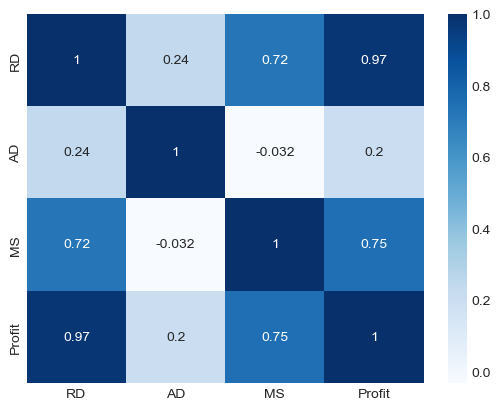

In [14]:
sns.heatmap(startup.corr(),annot=True,cmap=plt.cm.Blues)

# Preparing a model

In [15]:
#Build model
model=smf.ols('Profit~RD+AD+MS',data=startup).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Tue, 07 Mar 2023   Prob (F-statistic):           4.53e-30
Time:                        17:14:36   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
RD             0.8057      0.045     17.846      0.000       0.715       0.897
AD            -0.0268      0.051     -0.526      0.602      -0.130       0.076
MS             0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
plt.figure(figsize=(14,6))
plt.style.use("seaborn-darkgrid")
plt.scatter(df["YearsExperience"],df["Salary"],s=15,color="red")
plt.scatter(df["YearsExperience"],model1.fittedvalues,color="black")            
plt.xlabel("YearsExperience",size=20,color="blue")
plt.ylabel("Salary",size=20,color="blue")

# Calculating VIF

In [16]:
rsq_rd=smf.ols('RD~AD+MS',data=startup).fit().rsquared
vif_rd=1/(1-rsq_rd)

rsq_ad=smf.ols('AD~RD+MS',data=startup).fit().rsquared
vif_ad=1/(1-rsq_ad)

rsq_ms=smf.ols('MS~RD+AD',data=startup).fit().rsquared
vif_ms=1/(1-rsq_ms)

#Sorting vif values in a data frame
d1={'Variables':['RD','AD','MS'],'VIF':[vif_rd,vif_ad,vif_ms]}
Vif_frame=pd.DataFrame(d1)
Vif_frame


,Variables,VIF
0,RD,2.468903
1,AD,1.175091
2,MS,2.326773


# Test for normality of Residuals(Q-Q Plot)

(array([1., 0., 0., 0., 0., 0., 2., 1., 0., 1., 4., 8., 6., 9., 3., 3., 6.,
        3., 1., 2.]),
 array([-33533.7341113 , -30993.27589008, -28452.81766886, -25912.35944764,
        -23371.90122642, -20831.4430052 , -18290.98478398, -15750.52656276,
        -13210.06834154, -10669.61012032,  -8129.1518991 ,  -5588.69367788,
         -3048.23545666,   -507.77723544,   2032.68098578,   4573.139207  ,
          7113.59742822,   9654.05564943,  12194.51387065,  14734.97209187,
         17275.43031309]),
 <BarContainer object of 20 artists>)

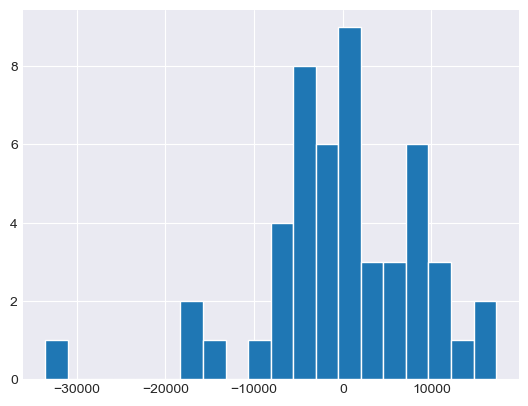

In [17]:
plt.hist(model.resid,bins=20)

{'whiskers': [<matplotlib.lines.Line2D at 0x1ff9b7bda60>,
 'caps': [<matplotlib.lines.Line2D at 0x1ff9b7bb700>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ff9b7bd7c0>],
 'medians': [<matplotlib.lines.Line2D at 0x1ff9b736a30>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ff9b736d00>],
 'means': []}

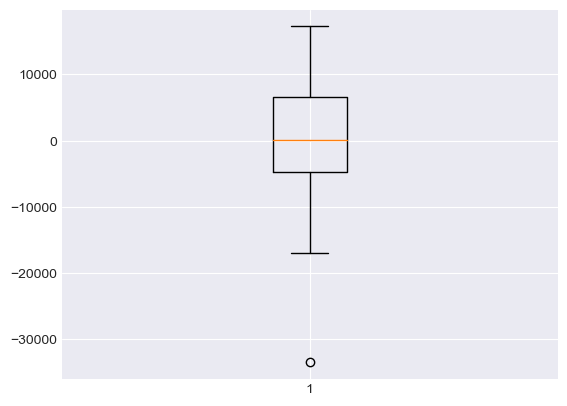

In [19]:
plt.boxplot(model.resid)

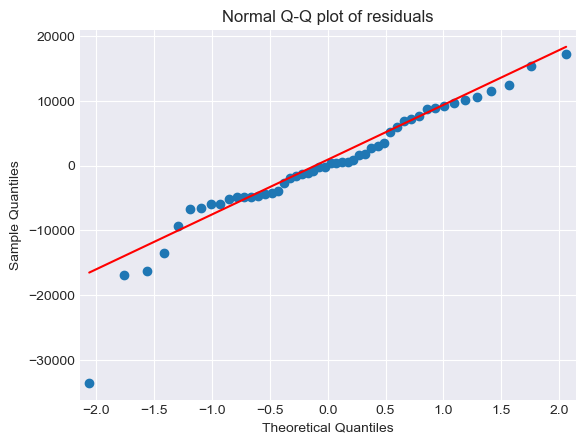

In [20]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

# Residual plot for homoscedasticity

In [21]:
def get_standardized_values(vals):
    return(vals-vals.mean())/vals.std()

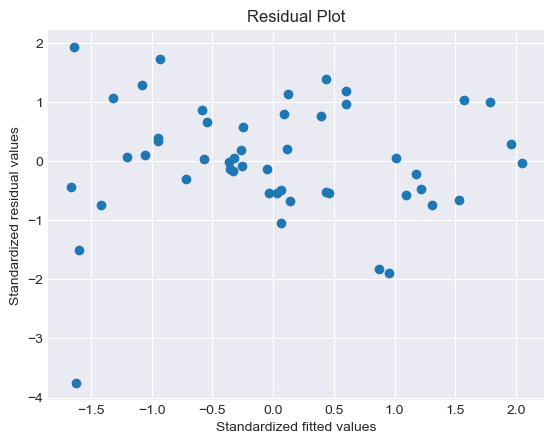

In [22]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))
plt.title("Residual Plot")
plt.xlabel("Standardized fitted values")
plt.ylabel("Standardized residual values")
plt.show()

# Residual v/s Regressors

eval_env: 1


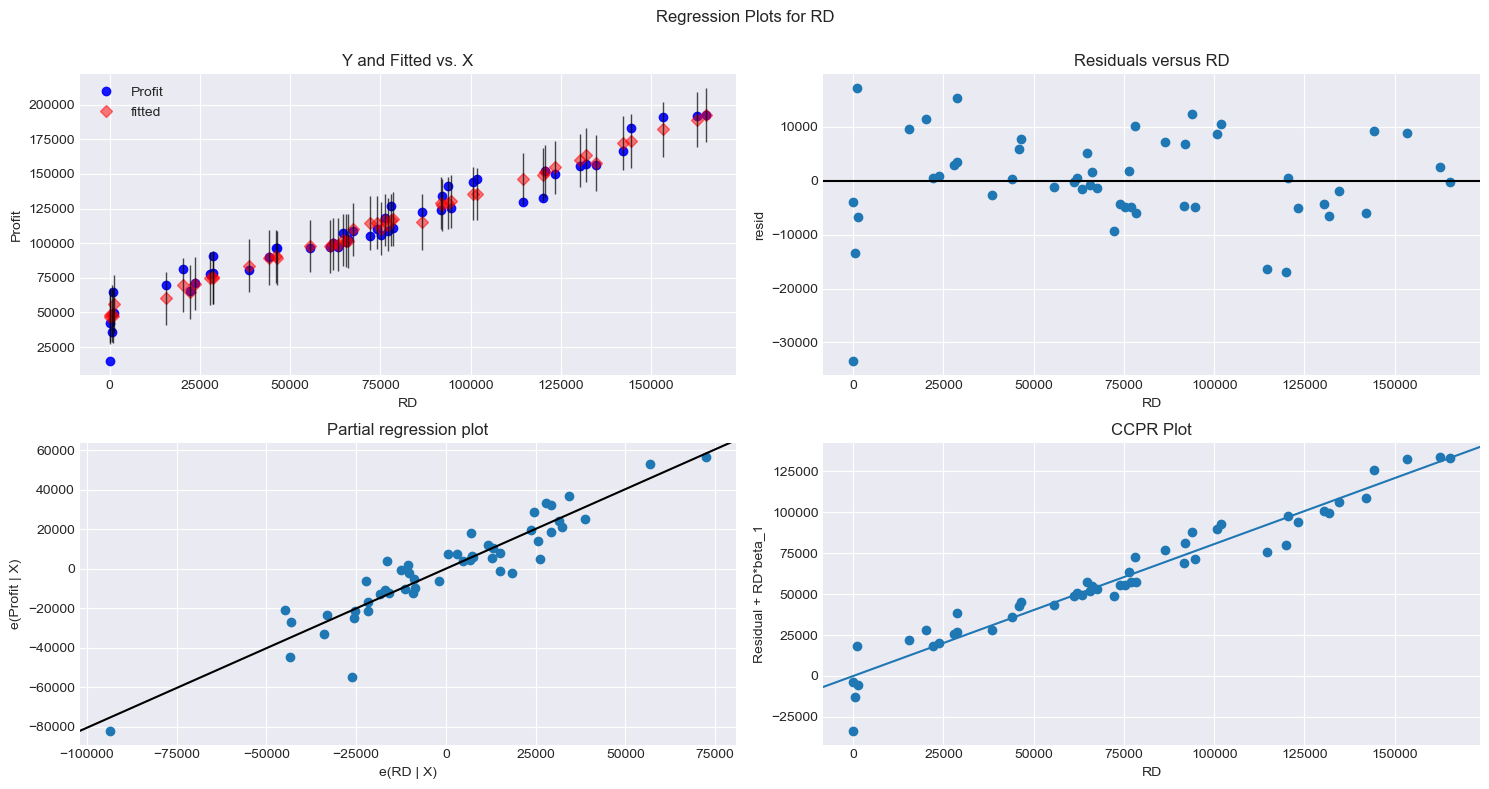

In [24]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,"RD",fig=fig)
plt.show()

eval_env: 1


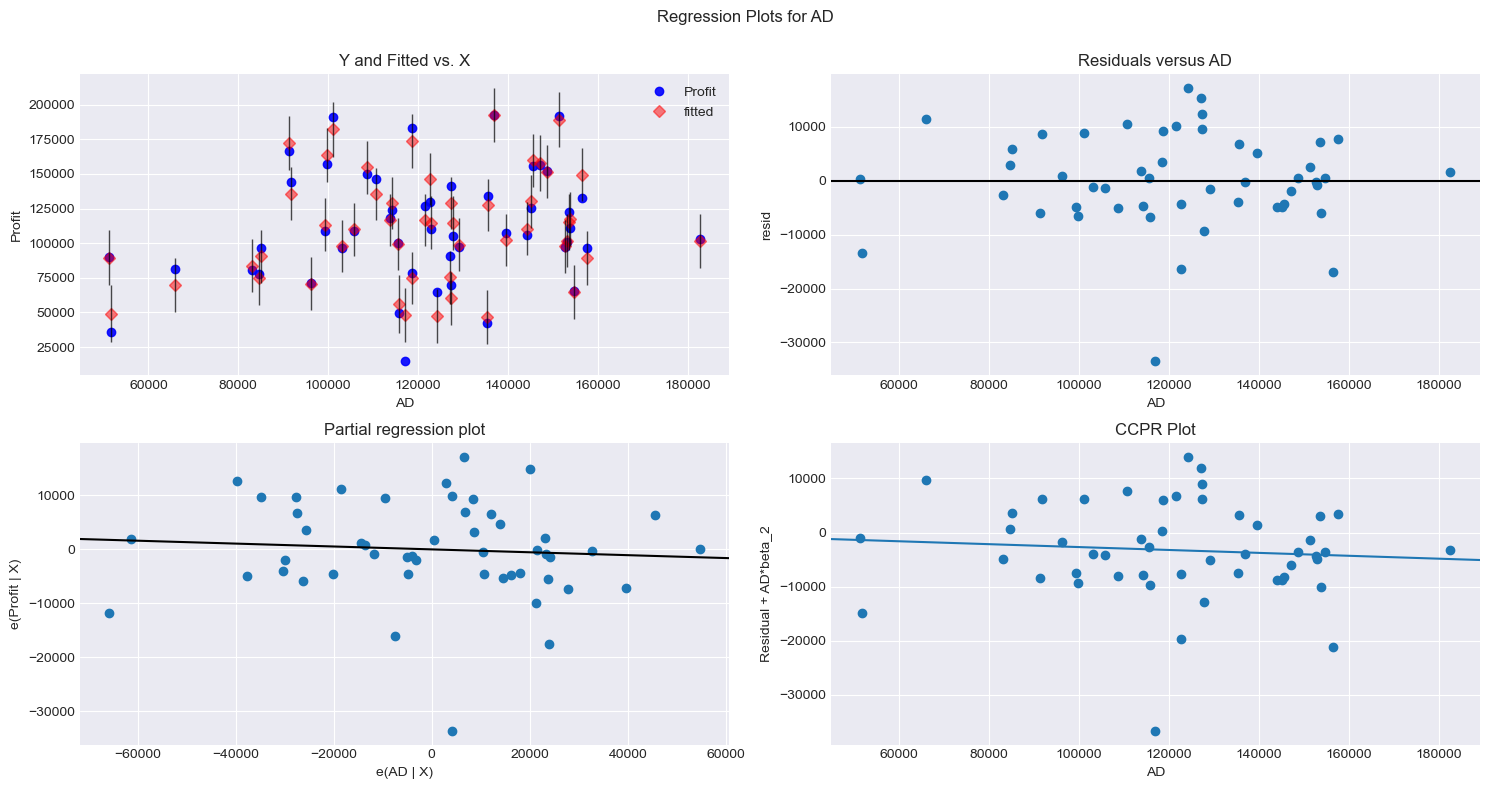

In [25]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,"AD",fig=fig)
plt.show()

eval_env: 1


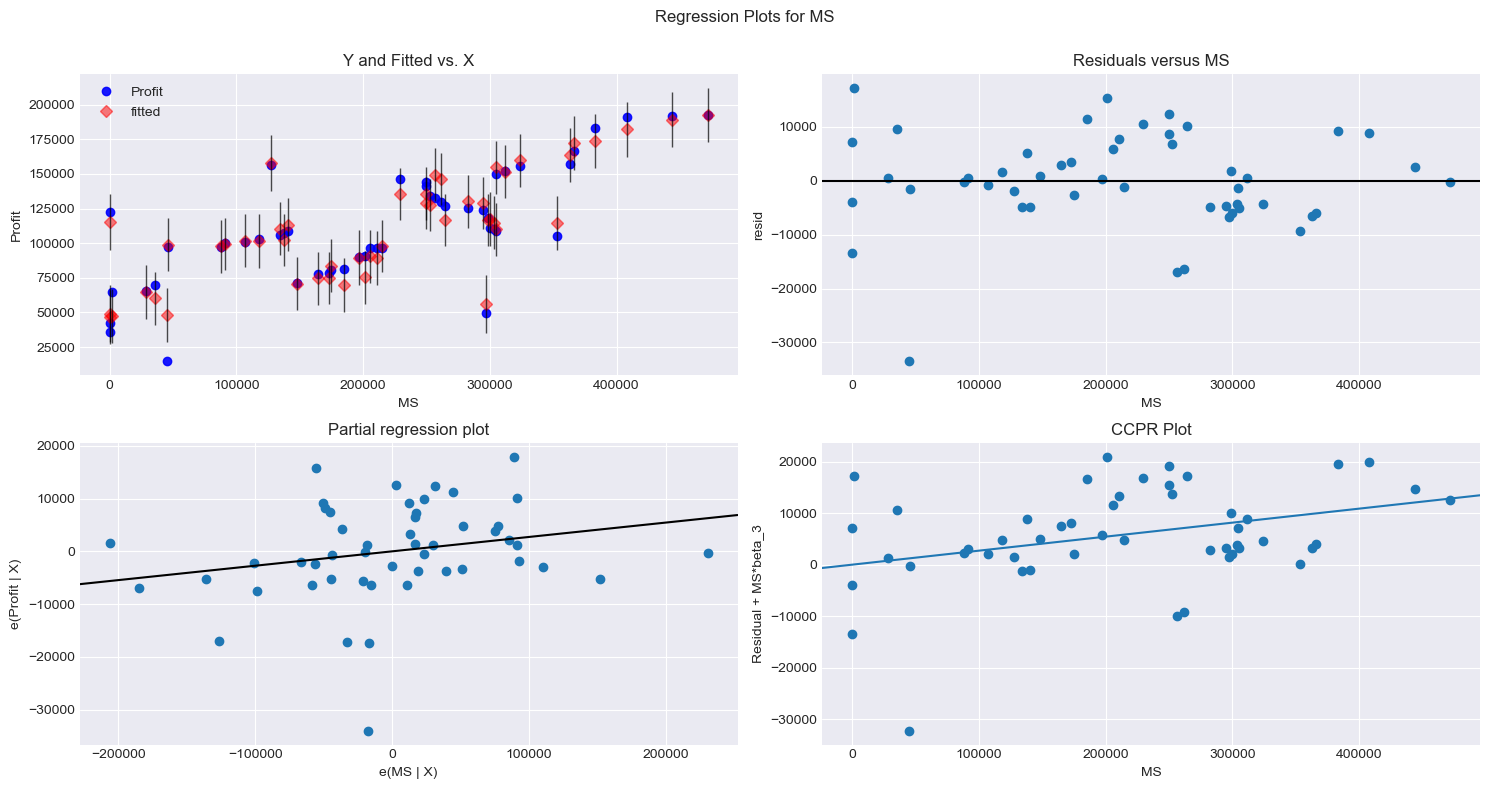

In [26]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,"MS",fig=fig)
plt.show()

# Model deletion diagnostics
(Detecting outliers)

# Cook's distance

In [28]:
model_influence=model.get_influence()
(c,_)=model_influence.cooks_distance

In [69]:
k=1
#Choose number of columns in final model 
N=startup.shape[0]
#number of rows
3*(k+1)/N

0.12

In [65]:
startup.columns

Index(['RD', 'AD', 'MS', 'State', 'Profit'], dtype='object')

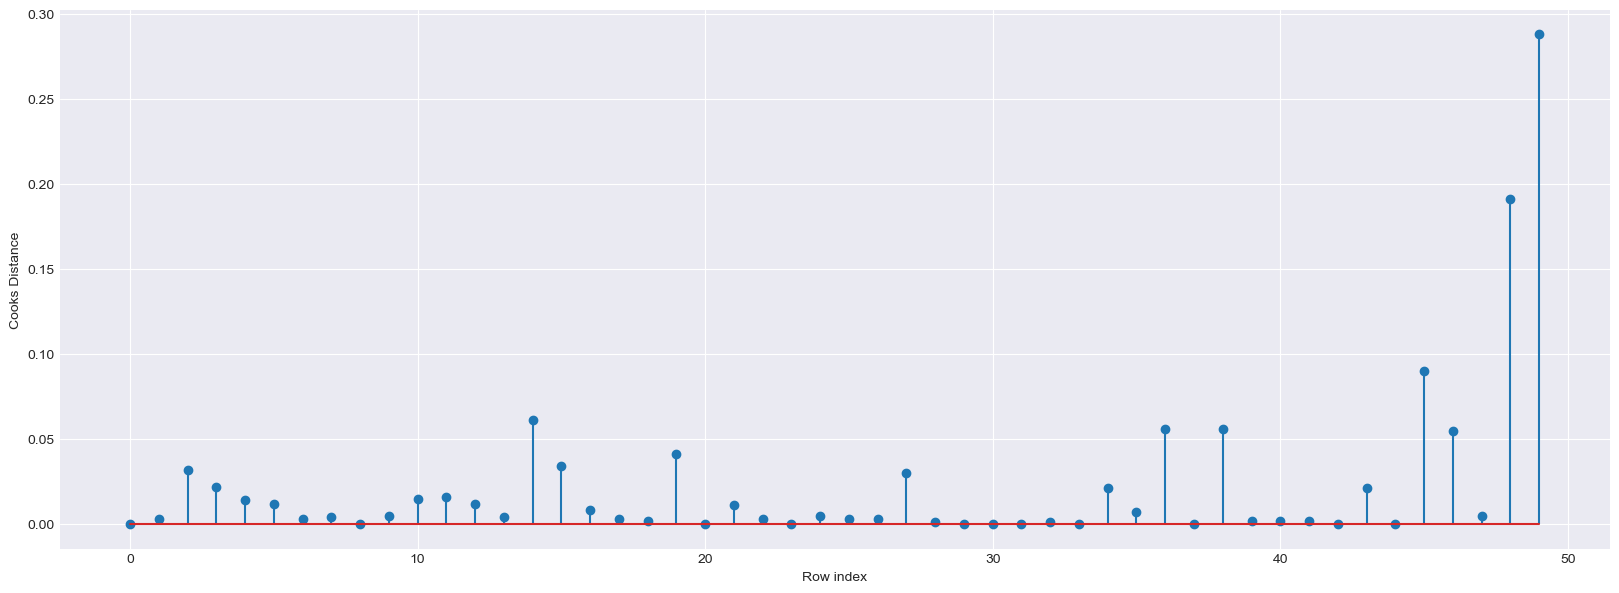

In [70]:
#Plot the influencers values using stem plot
plt.figure(figsize=(20,7))
plt.stem(np.arange(len(startup)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [71]:
(np.argmax(c),np.max(c))

(49, 0.28808229275432634)

In [72]:
np.where(c>0.12)

(array([48, 49], dtype=int64),)

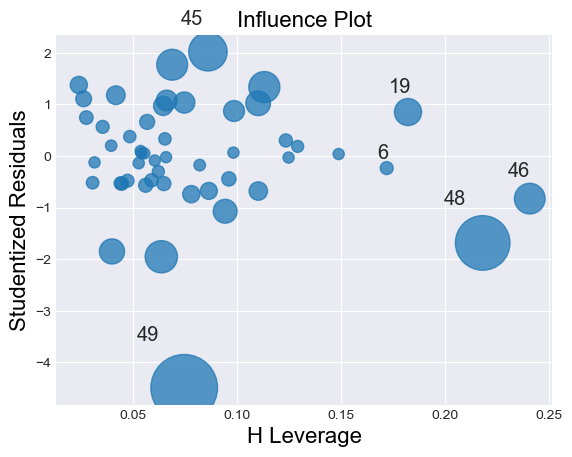

In [38]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

# Improving the model

In [73]:
#Discard the data points which are influencers and reasign the row number (reset_index())
start=startup.drop(startup.index[[48,49]],axis=0).reset_index()

In [74]:
#Drop the original index
start=start.drop(['index'],axis=1)

In [75]:
start

,RD,AD,MS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


# Build the model

In [76]:
#Exclude variable "WT" and generate R-Squared and AIC values
final_ml_V= smf.ols('Profit~RD+AD+MS',data = start).fit() 

In [77]:
(final_ml_V.rsquared,final_ml_V.aic) 

(0.9626766170294073, 994.6690439260116)

In [82]:
final_ml_V.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.960
Method:                 Least Squares   F-statistic:                     378.3
Date:                Tue, 07 Mar 2023   Prob (F-statistic):           2.03e-31
Time:                        18:15:19   Log-Likelihood:                -493.33
No. Observations:                  48   AIC:                             994.7
Df Residuals:                      44   BIC:                             1002.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    5.91e+04   5916.711      9.988      0.000    4.72e+04     7.1e+04
RD             0.7895      0.036     21.718      0.000       0.716       0.863
AD            -0.0633      0.044     -1.442      0.156      -0.152       0.025
MS             0.0169      0.014      1.249      0.218      -0.010       0.044
==============================================================================
Omnibus:                        0.287   Durbin-Watson:                   1.809
Prob(Omnibus):                  0.866   Jarque-Bera (JB):                0.475
Skew:                           0.057   Prob(JB):                        0.789
Kurtosis:                       2.526   Cond. No.                     1.58e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.58e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [83]:
#table containing R^2 value for each prepared model
d2={'Prep_Models':['Model','Final_Model'],'Rsquared':[model.rsquared,final_ml_V.rsquared]}
table=pd.DataFrame(d2)
table

,Prep_Models,Rsquared
0,Model,0.950746
1,Final_Model,0.962677
